<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Julia set

import numpy as np
import cmath
import itertools
from random import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt

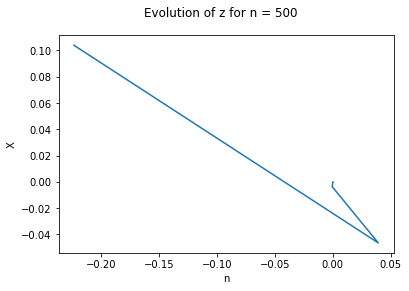

In [50]:
# Implement the map, plot the evolution of z (Re(z), Im(z))
def z_function(z, c):
    return z**2 + c

# Fix a value of C (can be 0)
c = 0
# Play around with values of z0, see the change of evolution
z = np.random.random(1) + np.random.random(1) * 1j

n = 500
Z = []; Zreal = []; Zimag = []
for i in range(n):
  z = z_function(z,c)
  Z.append(z)
  Zreal.append(z.real)
  Zimag.append(z.imag)

# Plot the evolution of Z
plt.suptitle('Evolution of z for n = {}'.format(n))
plt.xlabel('n')
plt.ylabel('X')
plt.plot(Zreal,Zimag)


In [27]:

def julia_black_and_white(min_value=-2, max_value=2, density=100, 
                 c= -0.8 + 0.156j, max_iter=100, limit=2):
    xvalues = np.linspace(max_value, min_value, density)
    yvalues = np.linspace(min_value, max_value, density)
    values_map = list(itertools.product(xvalues, yvalues)) 
    values_map = np.array(values_map).reshape(density, density, 2)
    Z = (values_map[...,1] + 1j * values_map[...,0]) 
    M = np.full((density, density), True, dtype=bool)
    
    for i in range(max_iter):
        Z[M] = Z[M] * Z[M] + c
        M[np.abs(Z) > limit] = False
        
    return ~M

    
def julia_colors(min_value=-2, max_value=2, density=100, c= -0.8 + 0.156j , max_iter=100, 
          limit=2):
    xvalues = np.linspace(max_value, min_value, density)
    yvalues = np.linspace(min_value, max_value, density)
    
    values_map = list(itertools.product(xvalues, yvalues)) # suboptimal solution
    values_map = np.array(values_map).reshape(density, density, 2)
    Z = (values_map[...,1] + 1j * values_map[...,0]) # array of complex values

    M = np.full((density, density), True, dtype=bool)
    I = np.zeros((density, density), dtype=int)
    for i in range(max_iter):
        Z[M] = Z[M] * Z[M] + c
        I[M] += 1
        M[np.abs(Z) > limit] = False
    return I

def plot_julia(values_map, color=False):
    plt.figure(figsize=(14, 11))
    if(color == False):
      plt.imshow(values_map, cmap=plt.cm.gray, extent=(-2, 2, -2, 2))
    else:
      plt.imshow(values_map, cmap=cm.gnuplot2, extent=(-2, 2, -2, 2))
    plt.tick_params(axis='both', labelsize=20)
    plt.xlabel('Re(Z)', fontsize=20)
    plt.ylabel('Im(Z)', fontsize=20)


# 1. Black and white colors of pixels

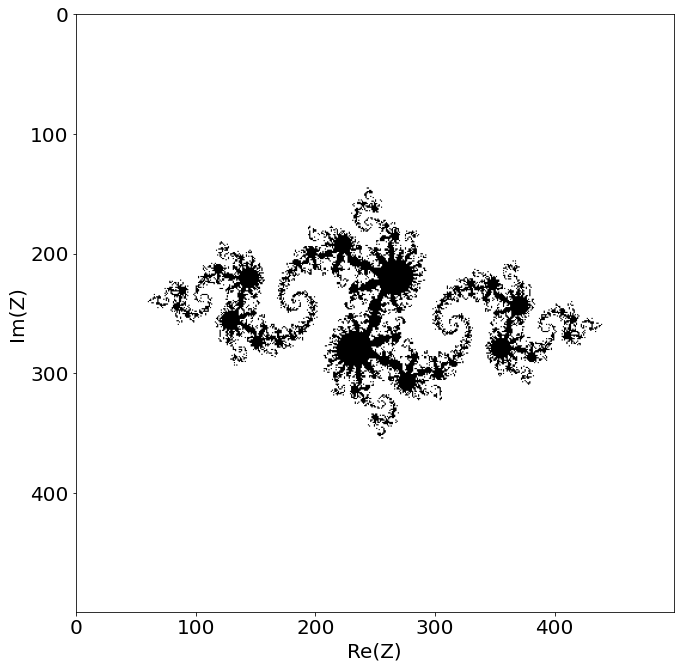

In [36]:
# Black and white colors of pixels
jb = julia_black_and_white(min_value=-2, max_value=2, density=500, max_iter=100, c = -0.8 + 0.156j)
plot_julia(jb, False)


# 2. Different colors for bifurcation points

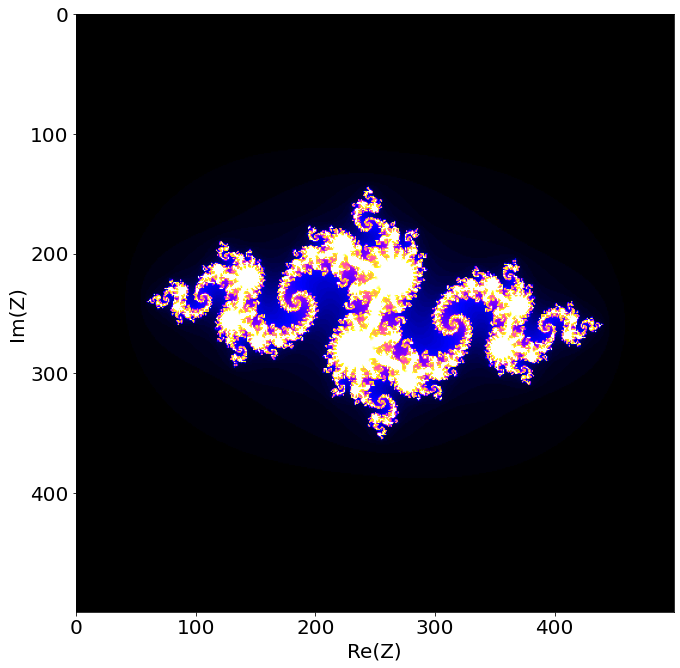

In [53]:

# Different colors
jb = julia_colors(min_value=-2, max_value=2, density=500, max_iter=100, c = -0.8 + 0.156j)
plot_julia(jb, True)



# 3. Generate figure of Julia set ($c = 1-r$) where r is the golden ratio. Label the axes ($Re(z_0)$, $Im(z_0)$), $fontsize$ should be 20, $figsize$ = (14,11)

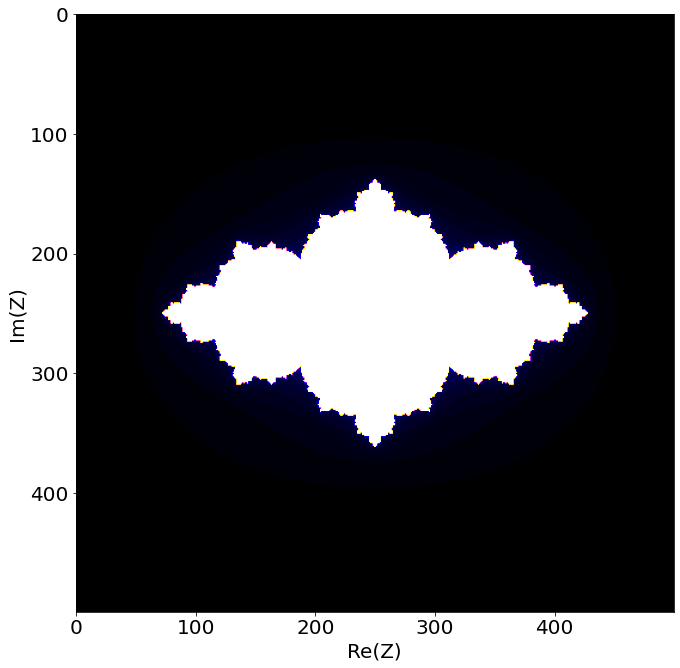

In [52]:
# Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label
# the axes (Re(z0), Im(z0)), fontsize should be 20, figsize = (14,11)
r = (1 + np.sqrt(5)) / 2 # golden ratio
jb = julia_colors(min_value=-2, max_value=2, density=500, max_iter=100, c = 1 - r)
plot_julia(jb, True)

# 4. Plot figures for $c=e^{ia}$, $a$ = ($0,2\pi$) write down axes like in subtask 3, create animation of these figures slowly changing the a

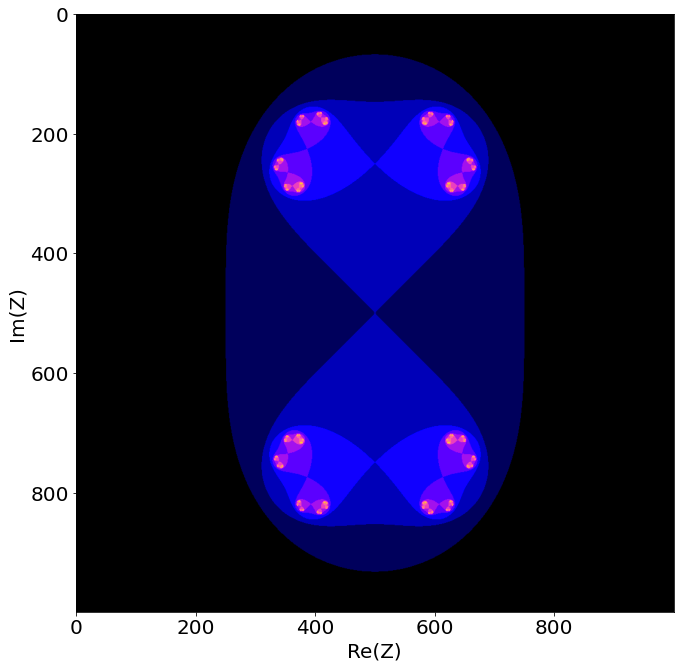

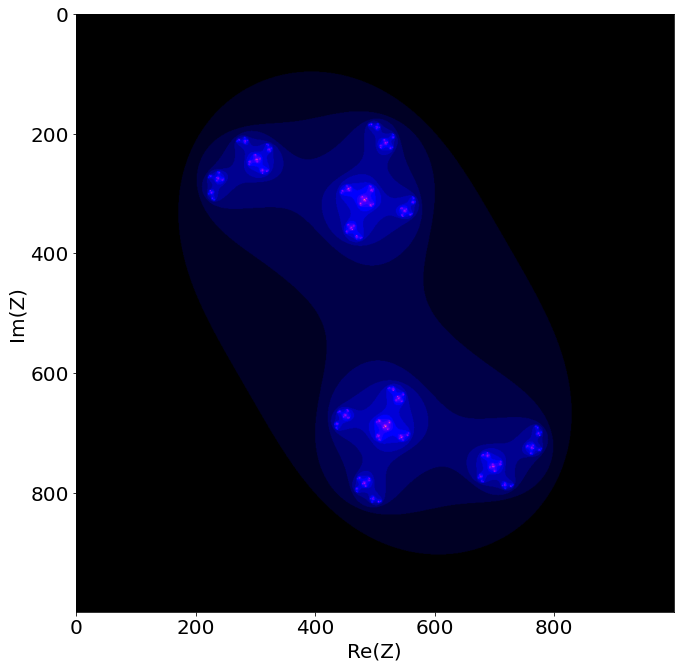

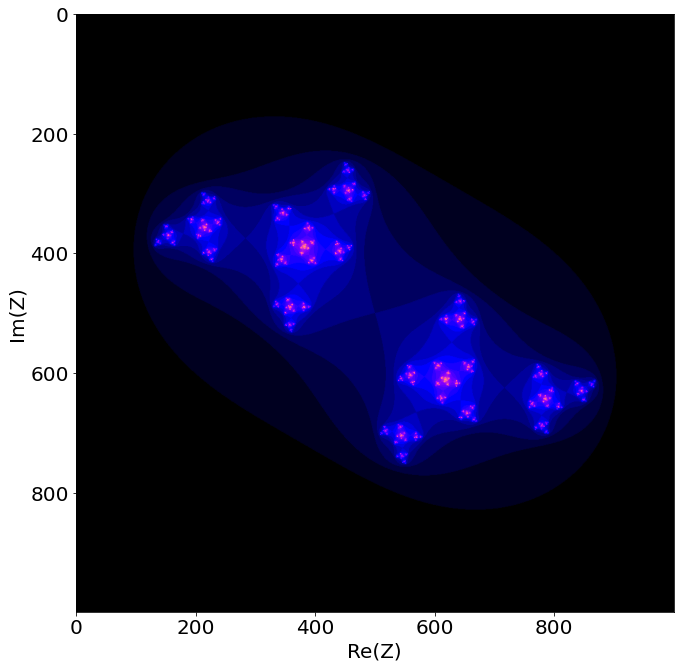

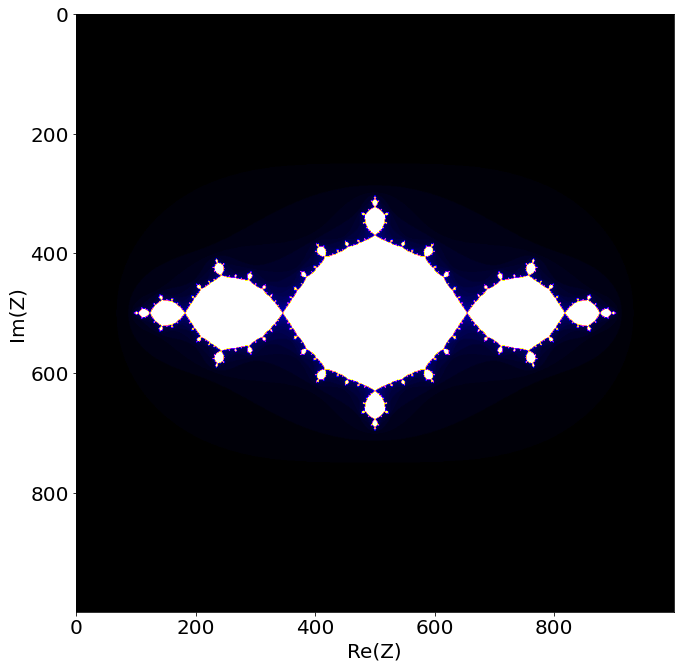

In [51]:
r = 1
alfa_values = np.linspace(0, np.pi, 4)
c_values = [cmath.rect(r, angle) for angle in alfa_values]
for c in c_values:
    j = julia_colors(min_value=-2, max_value=2, c=c, density=1000)
    plot_julia(j, True)

In [41]:
import os
from tqdm import tqdm
import imageio

def save_img(fname):
  plt.savefig(fname)
  plt.close()

def create_gif(r, c_density, duration=15):
    alfa_values = np.linspace(0, 2 * np.pi, c_density)
    c_values = [cmath.rect(r, angle) for angle in alfa_values]
    images = []
    for i, c in tqdm(enumerate(c_values), total=c_density):
        j = julia_colors(min_value=-2, max_value=2, c=c, density=1000)
            
        name = "julia"    
        fname = f'{name}_{i}.png'
        plot_julia(j, True)
        save_img(fname)
        images.append(imageio.imread(fname))
        os.remove(fname)
        
    fname = f'{name}.gif'
    imageio.mimsave(fname, images, fps = c_density / duration)
    
images = create_gif(r=1, c_density=100, duration=10)

100%|██████████| 100/100 [04:59<00:00,  2.99s/it]
